<a href="https://colab.research.google.com/github/MehrdadJalali-AI/socialNetworkOptimization/blob/main/Social_Network_Optimization_SNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Optimization (SNO) Algorithm

This notebook demonstrates a simple implementation of the **Social Network Optimization (SNO)** algorithm.

The idea is inspired by how information spreads in a social network. Each solution is represented as a node in a graph. High-quality solutions influence their neighbors, guiding the search toward optimal solutions.

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Benchmark Functions

We'll use two common test functions: Sphere and Rastrigin.

In [ ]:
def sphere(x):
    return sum([xi**2 for xi in x])

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

## Initialize Population
We initialize the population as nodes in a graph, where each node is a solution.

In [ ]:
def initialize_population(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.3)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = None
    return G

## Evaluate Fitness
Calculate the fitness of each node using the chosen benchmark function.

In [ ]:
def evaluate_fitness(G, func):
    for node in G.nodes:
        pos = G.nodes[node]['position']
        G.nodes[node]['fitness'] = func(pos)

## Information Diffusion
Better solutions influence their neighbors.

In [ ]:
def diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        neighbor_fitness = [G.nodes[n]['fitness'] for n in neighbors]
        best_neighbor = neighbors[np.argmin(neighbor_fitness)]
        new_positions[node] = (
            G.nodes[node]['position'] * (1 - alpha) +
            G.nodes[best_neighbor]['position'] * alpha
        )
    for node, pos in new_positions.items():
        G.nodes[node]['position'] = pos

## Optimization Loop
Run the SNO algorithm over multiple iterations.

In [ ]:
def sno_optimize(func, dim=2, bounds=(-5.12, 5.12), num_nodes=20, iterations=50):
    G = initialize_population(num_nodes, dim, bounds)
    best_fitness_over_time = []

    for _ in range(iterations):
        evaluate_fitness(G, func)
        diffuse_information(G)
        best_fitness = min([G.nodes[n]['fitness'] for n in G.nodes])
        best_fitness_over_time.append(best_fitness)

    return G, best_fitness_over_time

## Run and Visualize
Run the algorithm on both Sphere and Rastrigin functions and compare convergence.

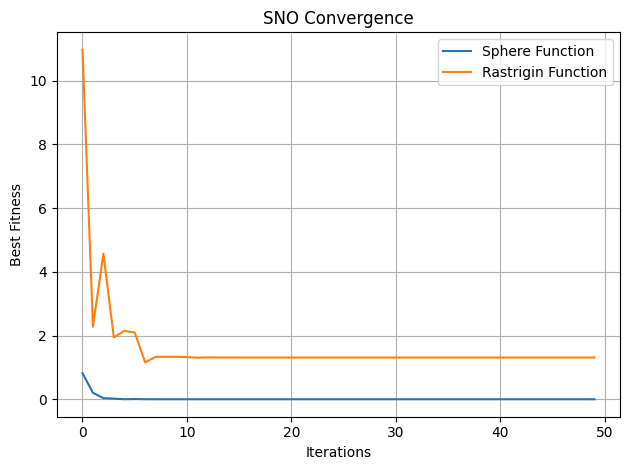

In [ ]:
G_sphere, fitness_sphere = sno_optimize(sphere)
G_rastrigin, fitness_rastrigin = sno_optimize(rastrigin)

plt.plot(fitness_sphere, label='Sphere Function')
plt.plot(fitness_rastrigin, label='Rastrigin Function')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('SNO Convergence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-9-f4a91cd32a84>:53: RuntimeWarning: invalid value encountered in arccos
  return sum([(np.cos((j + 1) * np.arccos(x[i])) - (-1) ** j) ** 2 for i in range(n) for j in range(n)])


               Function  Average Function Evaluations  \
0     Storn’s Chebyshev                        1000.0   
1       Inverse Hilbert                        1000.0   
2         Lennard-Jones                        1000.0   
3             Rastrigin                        1000.0   
4              Griewank                        1000.0   
5           Weierstrass                        1000.0   
6     Modified Schwefel                        1000.0   
7  Expanded Schaffer F6                        1000.0   
8             Happy Cat                        1000.0   
9                Ackley                        1000.0   

   SNO Average Best Fitness  Success Rate (SR)  Robustness Score  \
0                       NaN                0.0               NaN   
1              1.697759e+18                0.0      1.159987e+06   
2             -4.579199e+00                0.0      1.495453e+00   
3              1.205800e+03                0.0      4.478248e+05   
4              1.162647e+00     

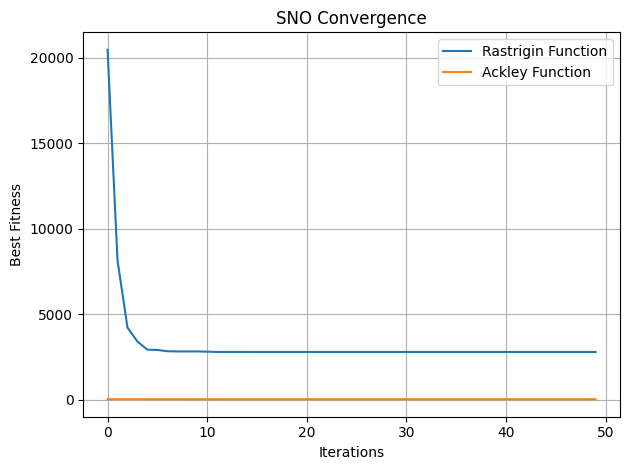

In [9]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# SNO Functions
def initialize_population(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.3)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = None
    return G

def evaluate_fitness(G, func):
    for node in G.nodes:
        pos = G.nodes[node]['position']
        G.nodes[node]['fitness'] = func(pos)
    return len(G.nodes)  # Return number of evaluations

def diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        neighbor_fitness = [G.nodes[n]['fitness'] for n in neighbors]
        best_neighbor = neighbors[np.argmin(neighbor_fitness)]
        new_positions[node] = (
            G.nodes[node]['position'] * (1 - alpha) +
            G.nodes[best_neighbor]['position'] * alpha
        )
    for node, pos in new_positions.items():
        G.nodes[node]['position'] = pos

def sno_optimize(func, dim, bounds, num_nodes=20, iterations=50):
    G = initialize_population(num_nodes, dim, bounds)
    best_fitness_over_time = []
    total_evaluations = 0

    for _ in range(iterations):
        evaluations = evaluate_fitness(G, func)
        total_evaluations += evaluations
        diffuse_information(G)
        best_fitness = min([G.nodes[n]['fitness'] for n in G.nodes])
        best_fitness_over_time.append(best_fitness)

    best_solution = G.nodes[np.argmin([G.nodes[n]['fitness'] for n in G.nodes])]['position']
    return G, best_fitness_over_time, best_solution, total_evaluations  # Return graph and fitness history

# Benchmark Functions
def storn_chebyshev(x):
    n = len(x)
    return sum([(np.cos((j + 1) * np.arccos(x[i])) - (-1) ** j) ** 2 for i in range(n) for j in range(n)])

def inverse_hilbert(x):
    n = len(x)
    H = np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])
    return np.linalg.norm(np.linalg.inv(H) - np.diag(x))

def lennard_jones(x, epsilon=1e-9):
    n = len(x) // 3
    X, Y, Z = x[:n], x[n:2*n], x[2*n:]
    energy = 0
    for i in range(n):
        for j in range(i + 1, n):
            r2 = (X[i] - X[j])**2 + (Y[i] - Y[j])**2 + (Z[i] - Z[j])**2
            if r2 < epsilon:
                continue
            energy += 4 * ((1/r2)**6 - (1/r2)**3)
    return energy

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def griewank(x):
    sum_part = sum(xi**2 / 4000 for xi in x)
    prod_part = np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)])
    return sum_part - prod_part + 1

def weierstrass(x, a=0.5, b=3, k_max=20):
    return sum([sum([a**k * np.cos(2 * np.pi * b**k * (xi + 0.5)) for k in range(k_max)]) for xi in x])

def modified_schwefel(x):
    return 418.9829 * len(x) - sum([xi * np.sin(np.sqrt(abs(xi))) for xi in x])

def expanded_schaffer_f6(x):
    def f6(xi, xj):
        return 0.5 + (np.sin(np.sqrt(xi**2 + xj**2))**2 - 0.5) / (1 + 0.001 * (xi**2 + xj**2))**2
    return sum([f6(x[i], x[i+1]) for i in range(len(x)-1)])

def happy_cat(x):
    alpha = 1/8
    sum_x2 = sum([xi**2 for xi in x])
    return ((sum_x2 - len(x))**2)**alpha + (0.5 * sum_x2 + sum(x)) / len(x) + 0.5

def ackley(x):
    a, b, c = 20, 0.2, 2 * np.pi
    d = len(x)
    return -a * np.exp(-b * np.sqrt(np.sum(x**2) / d)) - np.exp(np.sum(np.cos(c * x)) / d) + a + np.exp(1)

# Function Details
function_details = {
    "Storn’s Chebyshev": (9, [-8192, 8192]),
    "Inverse Hilbert": (16, [-16384, 16384]),
    "Lennard-Jones": (18, [-4, 4]),
    "Rastrigin": (10, [-100, 100]),
    "Griewank": (10, [-100, 100]),
    "Weierstrass": (10, [-100, 100]),
    "Modified Schwefel": (10, [-100, 100]),
    "Expanded Schaffer F6": (10, [-100, 100]),
    "Happy Cat": (10, [-100, 100]),
    "Ackley": (10, [-100, 100])
}

benchmark_functions = {
    "Storn’s Chebyshev": storn_chebyshev,
    "Inverse Hilbert": inverse_hilbert,
    "Lennard-Jones": lennard_jones,
    "Rastrigin": rastrigin,
    "Griewank": griewank,
    "Weierstrass": weierstrass,
    "Modified Schwefel": modified_schwefel,
    "Expanded Schaffer F6": expanded_schaffer_f6,
    "Happy Cat": happy_cat,
    "Ackley": ackley
}

global_optima = {
    "Storn’s Chebyshev": 0.0,
    "Inverse Hilbert": 0.0,
    "Lennard-Jones": -1.0,
    "Rastrigin": 0.0,
    "Griewank": 0.0,
    "Weierstrass": 0.0,
    "Modified Schwefel": 0.0,
    "Expanded Schaffer F6": 0.0,
    "Happy Cat": 0.0,
    "Ackley": 0.0
}

# Run SNO and Collect Metrics
num_runs = 10
max_iterations = 50
num_nodes = 20

metrics = {
    "Function": [],
    "Average Function Evaluations": [],
    "SNO Average Best Fitness": [],
    "Success Rate (SR)": [],
    "Robustness Score": [],
    "Population Diversity (PD)": [],
    "Success Rate with Threshold (SRT)": [],
    "Convergence Speed (CS)": []
}

for name, func in benchmark_functions.items():
    dim, bounds = function_details[name]
    best_fitnesses, function_evals, all_solutions = [], [], []

    for _ in range(num_runs):
        G, fitness_history, best_solution, evaluations = sno_optimize(func, dim, bounds, num_nodes, max_iterations)
        best_fitnesses.append(min(fitness_history))
        function_evals.append(evaluations)
        all_solutions.append(best_solution)

    mean_fitness = np.mean(best_fitnesses)
    mean_evals = np.mean(function_evals)
    variance_fitness = np.var(best_fitnesses)
    success_rate = np.mean(np.array([abs(f - global_optima[name]) <= 0.01 for f in best_fitnesses]))
    population_diversity = np.mean([np.var(sol) for sol in all_solutions])
    success_rate_threshold = np.mean(np.array([abs(f - global_optima[name]) <= 0.05 for f in best_fitnesses]))
    convergence_speed = mean_evals / max_iterations

    metrics["Function"].append(name)
    metrics["Average Function Evaluations"].append(mean_evals)
    metrics["SNO Average Best Fitness"].append(mean_fitness)
    metrics["Success Rate (SR)"].append(success_rate)
    metrics["Robustness Score"].append(variance_fitness)
    metrics["Population Diversity (PD)"].append(population_diversity)
    metrics["Success Rate with Threshold (SRT)"].append(success_rate_threshold)
    metrics["Convergence Speed (CS)"].append(convergence_speed)

# Store Results in DataFrame
df_results = pd.DataFrame(metrics)
df_results.to_csv("SNO_Results.csv", index=False)
print(df_results)

# Plot Convergence for Rastrigin and Ackley
G_rastrigin, fitness_rastrigin, _, _ = sno_optimize(rastrigin, 10, [-100, 100])
G_ackley, fitness_ackley, _, _ = sno_optimize(ackley, 10, [-100, 100])

plt.plot(fitness_rastrigin, label='Rastrigin Function')
plt.plot(fitness_ackley, label='Ackley Function')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('SNO Convergence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()